Images Name should be in Format(.jpg)
Enter the input file name :input4
274
COLOR_BGR2HLS


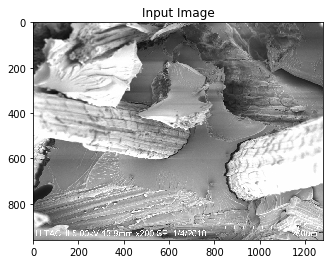

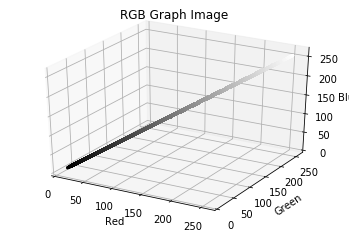

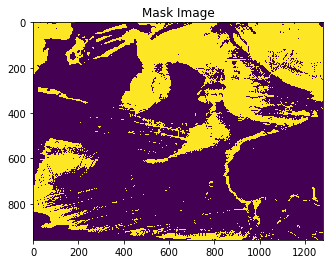

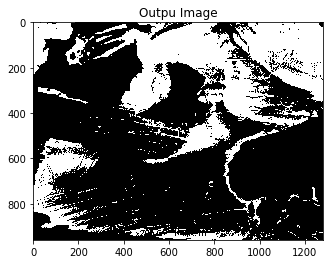

The percentage holes in the image are  71.56 %


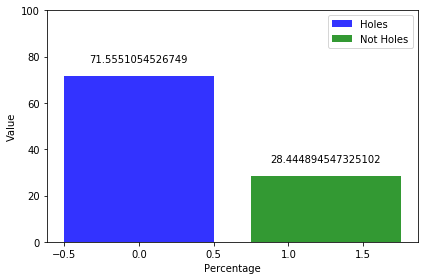

In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
print("Images Name should be in Format(.jpg)")
inp = input("Enter the input file name :")+".jpg"
grap = "RGB_graph_"+inp
masknm = "Mask_"+inp
outp = "output_"+inp
histo = "Histogram_"+inp
imgil = inp
im = Image.open(imgil, "r")
pix_val = list(im.getdata())

flags = [i for i in dir(cv2) if i.startswith("COLOR_")]
print(len(flags))
print(flags[40])
img= cv2.imread(imgil)
plt.imshow(img)
plt.title('Input Image')
plt.show()

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img2)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = img2.reshape((np.shape(img2)[0]*np.shape(img2)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.title('RGB Graph Image')
plt.show() #enable to show image during runtime
fig.savefig(grap)


black=(0,0,0)

lblack=(120,120,120)

mask = cv2.inRange(img2, black, lblack)
result = cv2.bitwise_and(img2, img2, mask=mask)
fig = plt.figure()
plt.title('Mask Image')
plt.imshow(mask)
fig.savefig(masknm)

fig = plt.figure()
plt.subplot(1, 1, 1)
plt.title('Outpu Image')
plt.imshow(result)
plt.imshow(mask, cmap="gray")
plt.show()
fig.savefig(outp)
img = cv2.imread(outp)
pixels = img.reshape(-1,3)
blackpix=0
total = len(pixels)
for pixel in pixels:
    if pixel[0] == pixel[1] == pixel[2] == 0:
        blackpix=blackpix+1
whitepix = total - blackpix
blackper = blackpix*100/total
whiteper = whitepix*100/total
white = "{:.2f}".format(whiteper)
print("The percentage holes in the image are ",white,"%")
%matplotlib inline
fig = plt.figure()
y = [0,1]
x = [whiteper,blackper]
plt.ylim(0,100)
plt.xlabel('Percentage')
plt.ylabel('Value')
bar_width = 1
index = 0
opacity = 0.8
w = str(x[0])
b = str(x[1])
rects1 = plt.bar(0, x[0], bar_width,alpha=opacity,color='b',label='Holes')
rects2 = plt.bar(index + bar_width+0.25, x[1], bar_width,alpha=opacity,color='g',label='Not Holes')
plt.tight_layout()
plt.legend()
plt.text(0, x[0]+5,x[0],ha='center', va='bottom')
plt.text(1.25, x[1]+5,x[1],ha='center', va='bottom')
plt.show()
fig.savefig(histo)
